# Working with OpenAI in Pixeltable

Pixeltable's OpenAI integration enables you to access OpenAI models via the OpenAI API.

### Prerequisites

- An OpenAI account with an API key (https://openai.com/index/openai-api/)

### Important notes

- OpenAI usage may incur costs based on your OpenAI plan.
- Be mindful of sensitive data and consider security measures when integrating with external services.

First you'll need to install required libraries and enter your OpenAI API key.

In [ ]:
%pip install -qU pixeltable openai

In [ ]:
import os
import getpass

if 'OPENAI_API_KEY' not in os.environ:
    os.environ['OPENAI_API_KEY'] = getpass.getpass(
        'Enter your OpenAI API key:'
    )

Now let's create a Pixeltable directory to hold the tables for our demo.

In [1]:
import pixeltable as pxt

# Remove the 'openai_demo' directory and its contents, if it exists
pxt.drop_dir('openai_demo', force=True)
pxt.create_dir('openai_demo')

Connected to Pixeltable database at: postgresql+psycopg://postgres:@/pixeltable?host=/Users/asiegel/.pixeltable/pgdata
Created directory 'openai_demo'.


## Chat completions

Create a Table: In Pixeltable, create a table with columns to represent your input data and the columns where you want to store the results from OpenAI.

In [2]:
from pixeltable.functions import openai

# Create a table in Pixeltable and add a computed column that calls OpenAI

t = pxt.create_table('openai_demo/chat', {'input': pxt.String})

messages = [{'role': 'user', 'content': t.input}]
t.add_computed_column(
    output=openai.chat_completions(
        messages=messages,
        model='gpt-4o-mini',
        model_kwargs={
            # Optional dict with parameters for the OpenAI API
            'max_tokens': 300,
            'top_p': 0.9,
            'temperature': 0.7,
        },
    )
)

Created table 'chat'.
Added 0 column values with 0 errors in 0.01 s


No rows affected.

In [3]:
# Parse the response into a new column
t.add_computed_column(response=t.output.choices[0].message.content)

Added 0 column values with 0 errors in 0.01 s


No rows affected.

In [4]:
# Start a conversation
t.insert(
    [{'input': 'How many islands are in the Aleutian island chain?'}]
)
t.select(t.input, t.response).head()

Inserted 1 row with 0 errors in 3.39 s (0.29 rows/s)


input,response
How many islands are in the Aleutian island chain?,"The Aleutian Islands, which stretch from Alaska toward Russia, comprise approximately 300 islands. This chain is part of the larger Aleutian Arc, which includes both large and small islands, some of which are uninhabited. The exact number can vary depending on how one defines an island, including whether smaller islets are counted."


## Embeddings

Note: OpenAI Embeddings API is not available with free tier API keys

In [5]:
emb_t = pxt.create_table('openai_demo/embeddings', {'input': pxt.String})
emb_t.add_computed_column(
    embedding=openai.embeddings(
        input=emb_t.input, model='text-embedding-3-small'
    )
)

Created table 'embeddings'.
Added 0 column values with 0 errors in 0.01 s


No rows affected.

In [6]:
emb_t.insert(
    [{'input': 'OpenAI provides a variety of embeddings models.'}]
)

Inserted 1 row with 0 errors in 1.03 s (0.97 rows/s)


1 row inserted.

In [7]:
emb_t.head()

input,embedding
OpenAI provides a variety of embeddings models.,[-0.023 -0.045 0.069 -0.017 -0.008 -0.027 ... 0.009 0.005 0.021 0.018 -0.012 -0.008]


## Image generations

In [8]:
image_t = pxt.create_table('openai_demo/images', {'input': pxt.String})
image_t.add_computed_column(
    img=openai.image_generations(image_t.input, model='dall-e-2')
)

Created table 'images'.
Added 0 column values with 0 errors in 0.01 s


No rows affected.

In [9]:
image_t.insert(
    [
        {
            'input': 'A giant Pixel floating in the open ocean in a sea of data'
        }
    ]
)

Inserted 1 row with 0 errors in 11.59 s (0.09 rows/s)


1 row inserted.

In [10]:
image_t

table 'openai_demo/images'

 Column Name                 Type                               Computed With
       input               String                                            
         img  Image[(1024, 1024)]  image_generations(input, model='dall-e-2')

input,img
A giant Pixel floating in the open ocean in a sea of data,

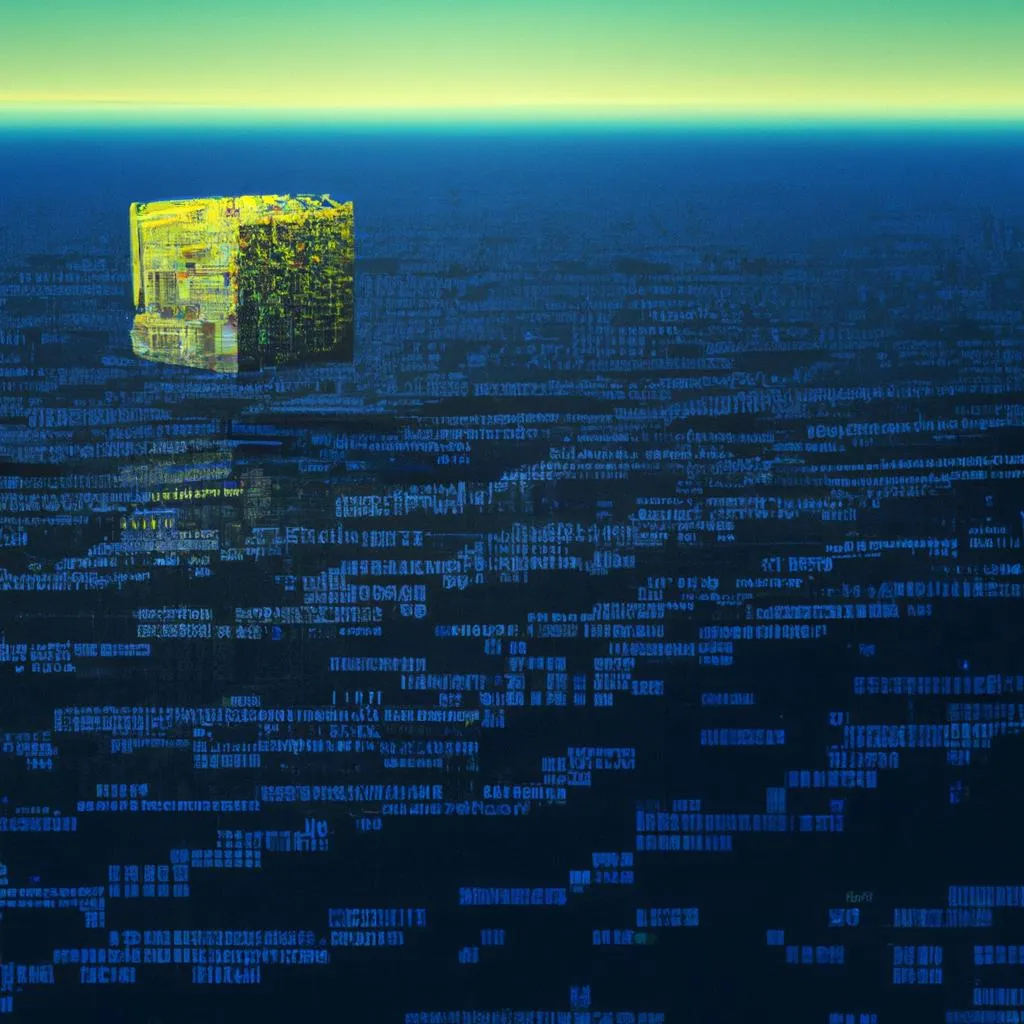

In [11]:
image_t.head()

## Audio Transcription

In [12]:
audio_t = pxt.create_table('openai_demo/audio', {'input': pxt.Audio})
audio_t.add_computed_column(
    result=openai.transcriptions(
        audio_t.input,
        model='whisper-1',
        model_kwargs={
            'language': 'en',
            'prompt': 'Transcribe the contents of this recording.',
        },
    )
)

Created table 'audio'.
Added 0 column values with 0 errors in 0.01 s


No rows affected.

In [13]:
url = (
    'https://github.com/pixeltable/pixeltable/raw/release/tests/data/audio/'
    'jfk_1961_0109_cityuponahill-excerpt.flac'
)
audio_t.insert([{'input': url}])

Inserted 1 row with 0 errors in 5.42 s (0.18 rows/s)


1 row inserted.

In [14]:
audio_t.head()

input,result
,"{""text"": ""Allow me to illustrate. During the last 60 days, I have been at the task of constructing an administration. It has been a long and deliberate proc ...... a hill. The eyes of all peoples are upon us. Today the eyes of all people are truly upon us. And our governments, in every branch, at every level,"", ""usage"": {""type"": ""duration"", ""seconds"": 60}, ""logprobs"": null}"


In [15]:
audio_t.head()[0]['result']['text']

'Allow me to illustrate. During the last 60 days, I have been at the task of constructing an administration. It has been a long and deliberate process. Some have counseled greater speed. Others have counseled more expedient tests. But I have been guided by the standard John Winthrop set before his shipmates on the flagship Arabella 331 years ago, as they too faced the task of building a new government on a perilous frontier. We must always consider, he said, that we shall be as a city upon a hill. The eyes of all peoples are upon us. Today the eyes of all people are truly upon us. And our governments, in every branch, at every level,'

### Learn more

To learn more about advanced techniques like RAG operations in Pixeltable, check out the [RAG Operations in Pixeltable](https://docs.pixeltable.com/howto/use-cases/rag-operations) tutorial.

If you have any questions, don't hesitate to reach out.